In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2021-01-11T17:00:00,3,Lombardia,3522,462,3984,50523,54507,-3291,1488,...,62.0,13356.0,5224.0,-3218.0,11.60,7.31,11.14,28.48,0.65,-5.69
322,2021-01-12T17:00:00,3,Lombardia,3641,466,4107,50308,54415,-92,1146,...,54.0,15964.0,5384.0,-215.0,11.35,7.55,7.18,21.29,0.87,-0.17
323,2021-01-13T17:00:00,3,Lombardia,3651,462,4113,50850,54963,548,2245,...,51.0,31880.0,9584.0,542.0,11.23,7.48,7.04,23.42,-0.86,1.01
324,2021-01-14T17:00:00,3,Lombardia,3614,468,4082,52018,56100,1137,2587,...,72.0,28645.0,9629.0,1168.0,11.46,7.28,9.03,26.87,1.30,2.07


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2205
Nuovi tamponi: 33947.0
Percentuale nuovi positivi/nuovi tamponi: 6.5 %
Nuovi guariti: 1083.0
Nuovi deceduti: 68.0
Variazione positivi ricoverati con sintomi: -13.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 1069.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,3,Lombardia,7901,855,8756,143583,152339,-10202,4128,...,99.0,18037.0,7285.0,-10340.0,9.76,5.75,22.89,56.66,2.15,-6.28
1,2020-11-17T17:00:00,3,Lombardia,8151,894,9045,147522,156567,4228,8448,...,202.0,38283.0,17384.0,3939.0,9.88,5.78,22.07,48.60,4.56,2.78
2,2020-11-18T17:00:00,3,Lombardia,8323,903,9226,142857,152083,-4484,7633,...,182.0,38100.0,15780.0,-4665.0,9.79,6.07,20.03,48.37,1.01,-2.86
3,2020-11-19T17:00:00,3,Lombardia,8291,915,9206,146374,155580,3497,7453,...,165.0,37595.0,15423.0,3517.0,9.94,5.92,19.82,48.32,1.33,2.30
4,2020-11-20T17:00:00,3,Lombardia,8304,930,9234,150407,159641,4061,9221,...,175.0,42248.0,13213.0,4033.0,10.07,5.78,21.83,69.79,1.64,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-11T17:00:00,3,Lombardia,3522,462,3984,50523,54507,-3291,1488,...,62.0,13356.0,5224.0,-3218.0,11.60,7.31,11.14,28.48,0.65,-5.69
57,2021-01-12T17:00:00,3,Lombardia,3641,466,4107,50308,54415,-92,1146,...,54.0,15964.0,5384.0,-215.0,11.35,7.55,7.18,21.29,0.87,-0.17
58,2021-01-13T17:00:00,3,Lombardia,3651,462,4113,50850,54963,548,2245,...,51.0,31880.0,9584.0,542.0,11.23,7.48,7.04,23.42,-0.86,1.01
59,2021-01-14T17:00:00,3,Lombardia,3614,468,4082,52018,56100,1137,2587,...,72.0,28645.0,9629.0,1168.0,11.46,7.28,9.03,26.87,1.30,2.07


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

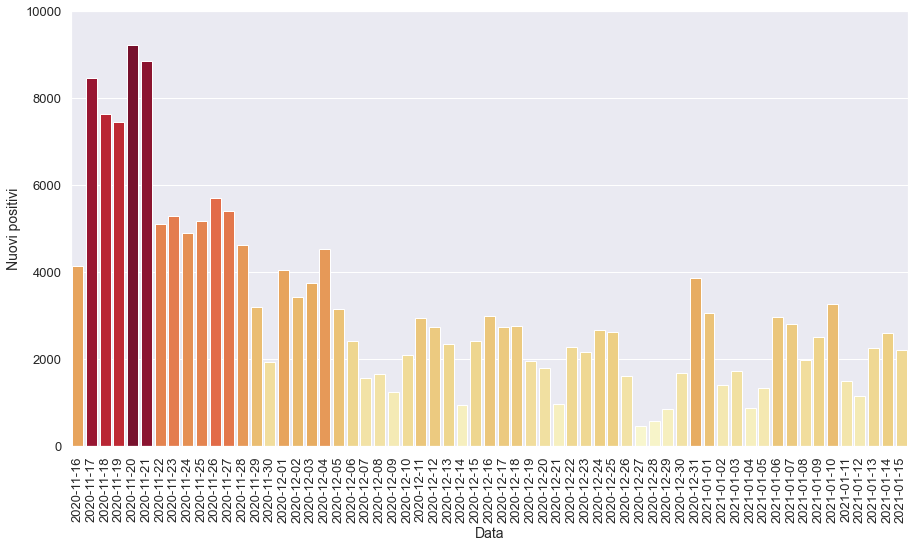

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

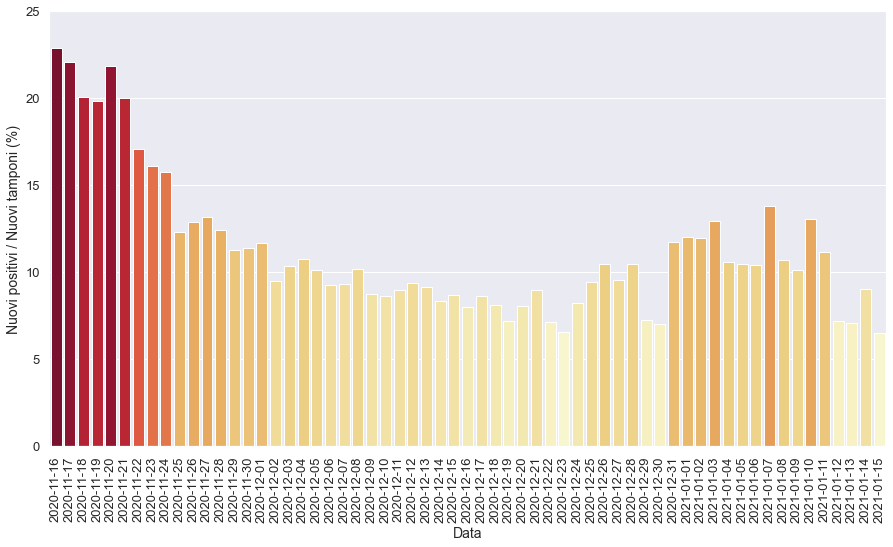

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

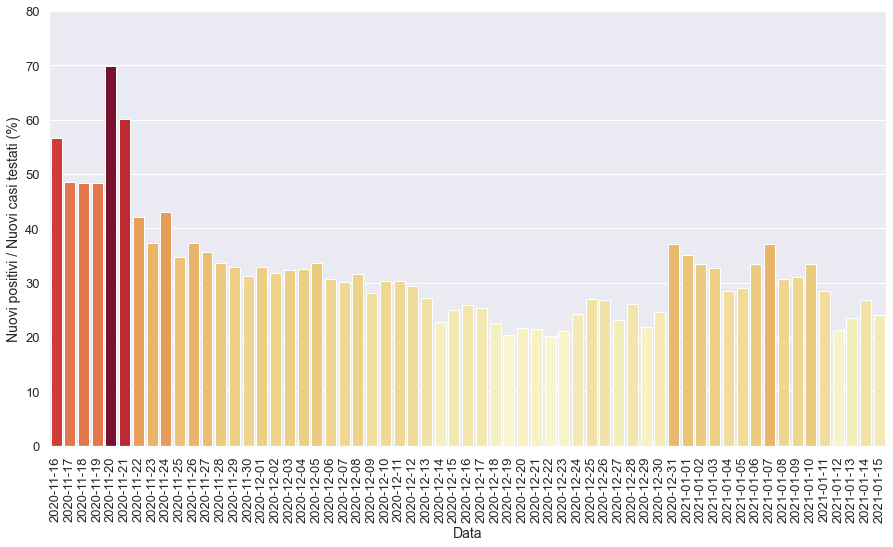

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

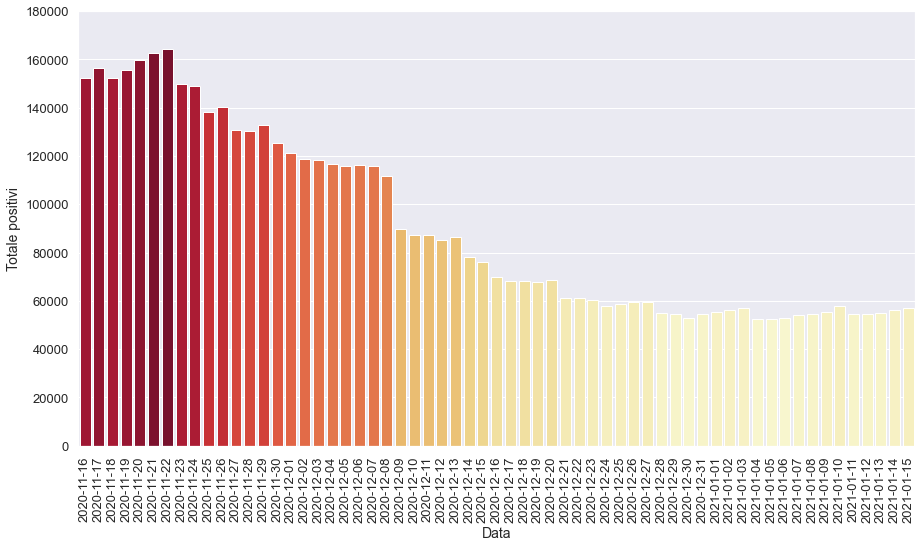

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

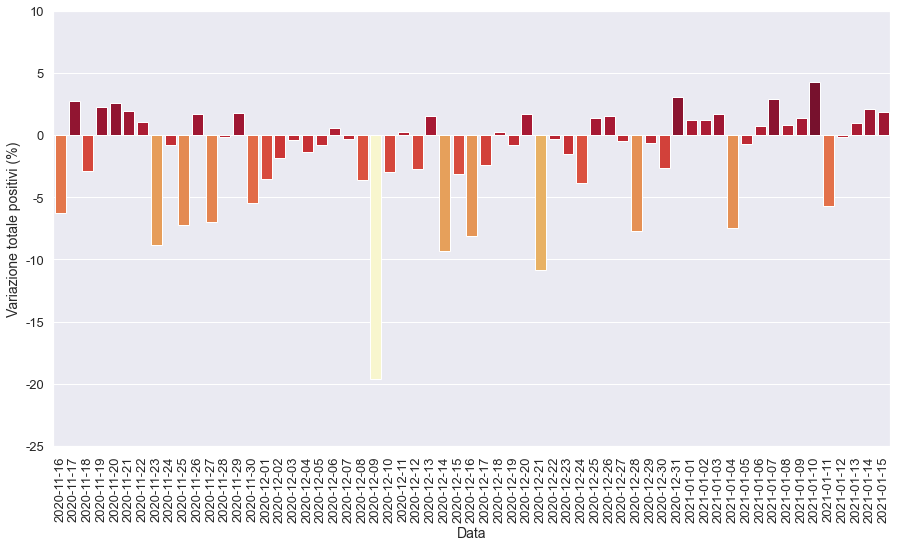

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

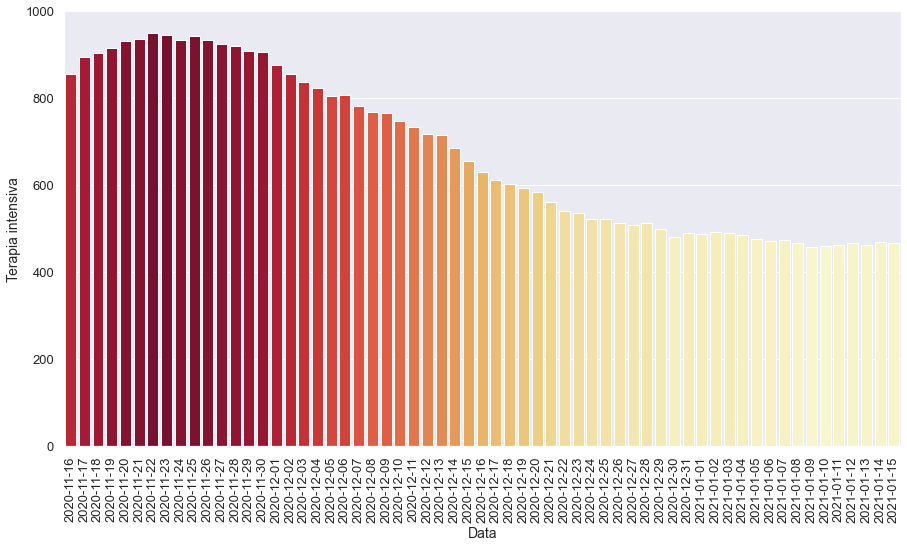

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

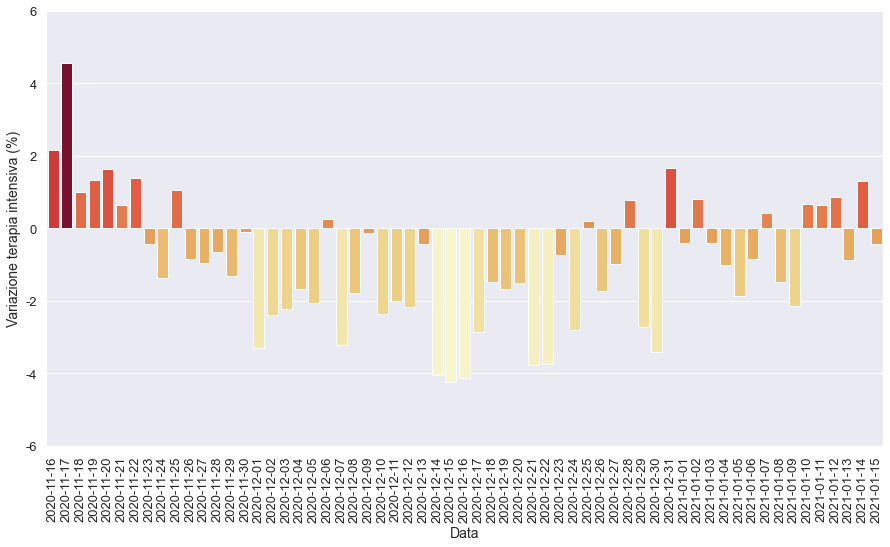

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

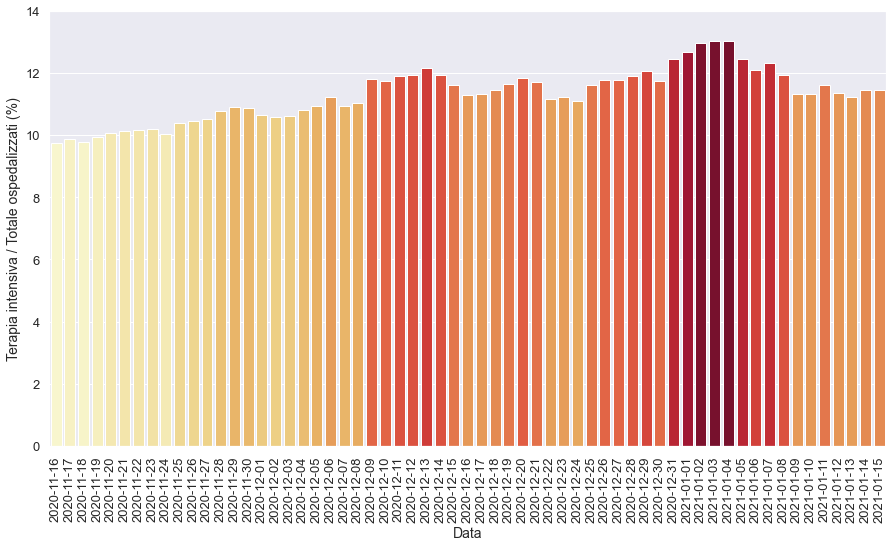

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

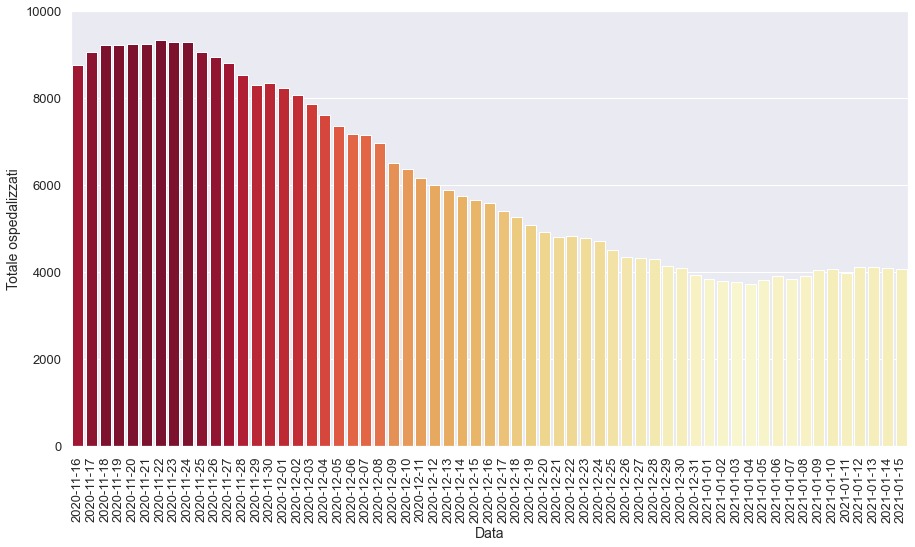

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

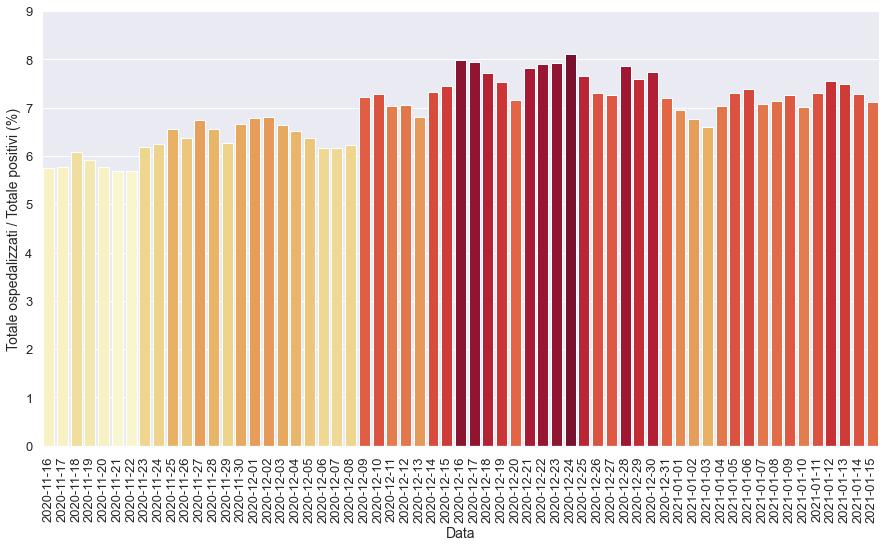

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

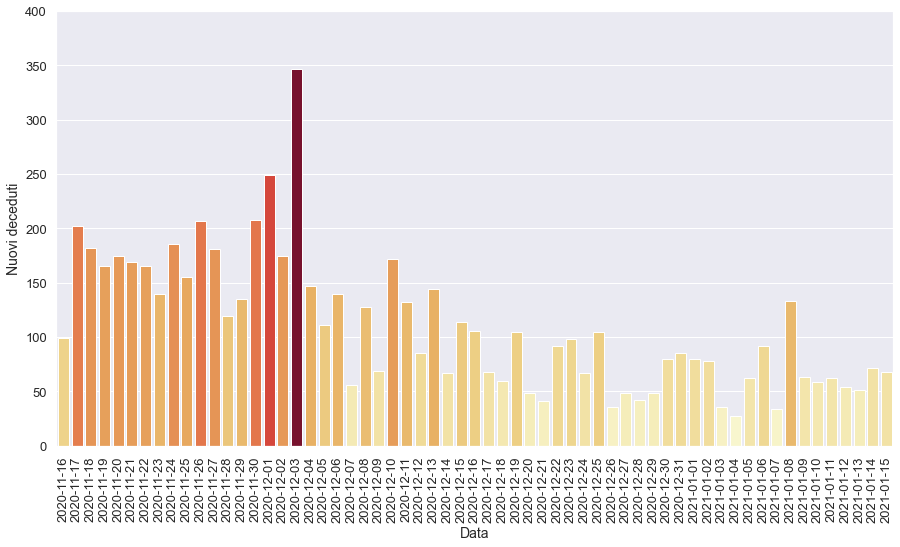

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

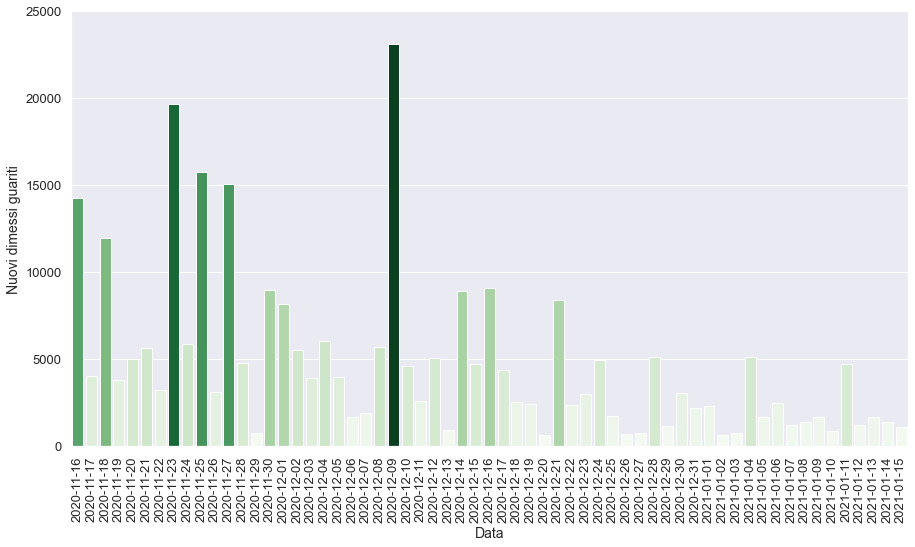

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-16T17:00:00,3,Lombardia,4946,629,5575,64158,69733,-6157,2994,...,106.0,37605.0,11576.0,-6080.0,11.28,7.99,7.96,25.86,-4.12,-8.11
1,2020-12-17T17:00:00,3,Lombardia,4793,611,5404,62637,68041,-1692,2730,...,68.0,31587.0,10792.0,-1521.0,11.31,7.94,8.64,25.30,-2.86,-2.43
2,2020-12-18T17:00:00,3,Lombardia,4656,602,5258,62952,68210,169,2744,...,60.0,33846.0,12194.0,315.0,11.45,7.71,8.11,22.50,-1.47,0.25
3,2020-12-19T17:00:00,3,Lombardia,4495,592,5087,62566,67653,-557,1944,...,105.0,27044.0,9517.0,-386.0,11.64,7.52,7.19,20.43,-1.66,-0.82
4,2020-12-20T17:00:00,3,Lombardia,4341,583,4924,63857,68781,1128,1795,...,49.0,22421.0,8253.0,1291.0,11.84,7.16,8.01,21.75,-1.52,1.67
5,2020-12-21T17:00:00,3,Lombardia,4232,561,4793,56521,61314,-7467,950,...,41.0,10587.0,4405.0,-7336.0,11.70,7.82,8.97,21.57,-3.77,-10.86
6,2020-12-22T17:00:00,3,Lombardia,4290,540,4830,56314,61144,-170,2278,...,92.0,31939.0,11253.0,-207.0,11.18,7.90,7.13,20.24,-3.74,-0.28
7,2020-12-23T17:00:00,3,Lombardia,4243,536,4779,55460,60239,-905,2153,...,98.0,32926.0,10232.0,-854.0,11.22,7.93,6.54,21.04,-0.74,-1.48
8,2020-12-24T17:00:00,3,Lombardia,4178,521,4699,53209,57908,-2331,2656,...,67.0,32294.0,10934.0,-2251.0,11.09,8.11,8.22,24.29,-2.80,-3.87
9,2020-12-25T17:00:00,3,Lombardia,3976,522,4498,54212,58710,802,2628,...,105.0,27942.0,9754.0,1003.0,11.61,7.66,9.41,26.94,0.19,1.38


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

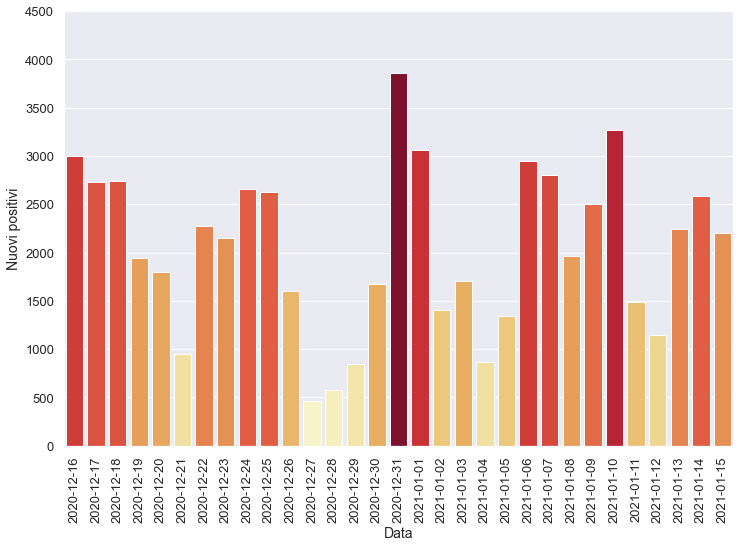

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

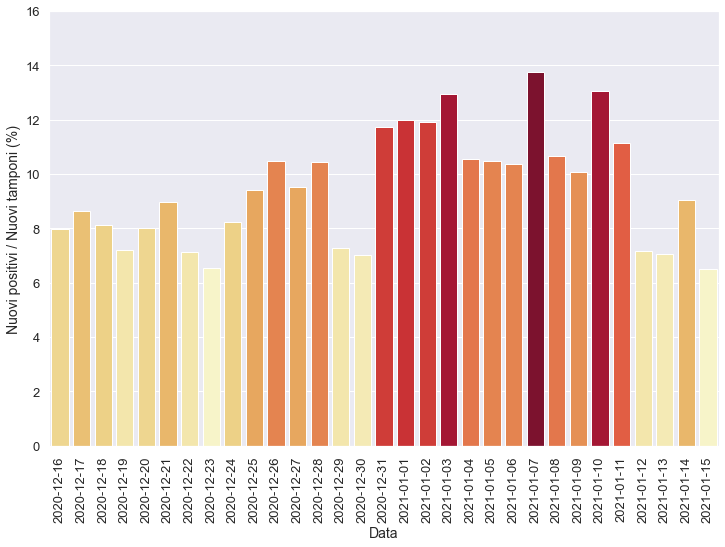

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

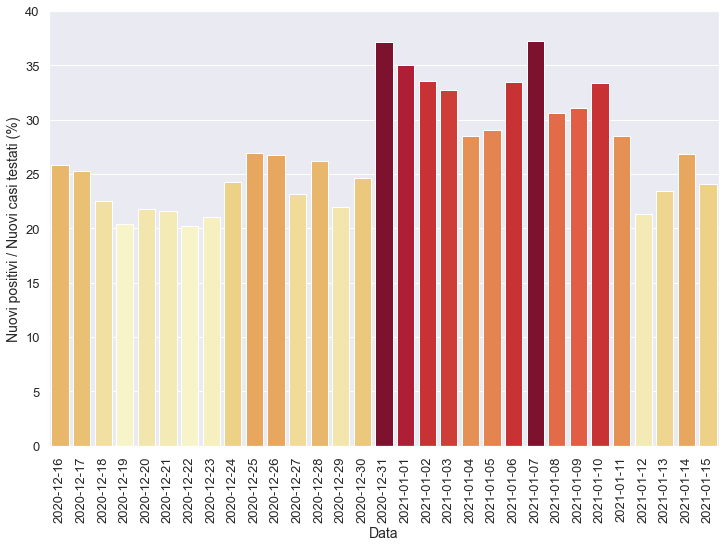

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

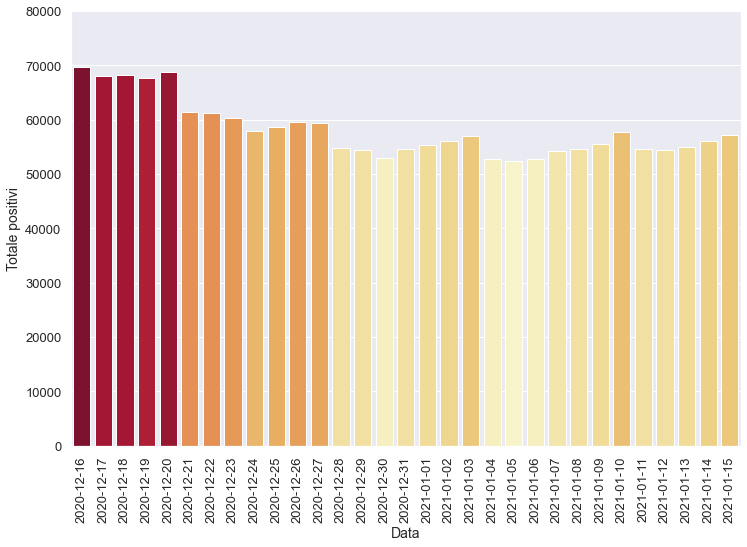

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

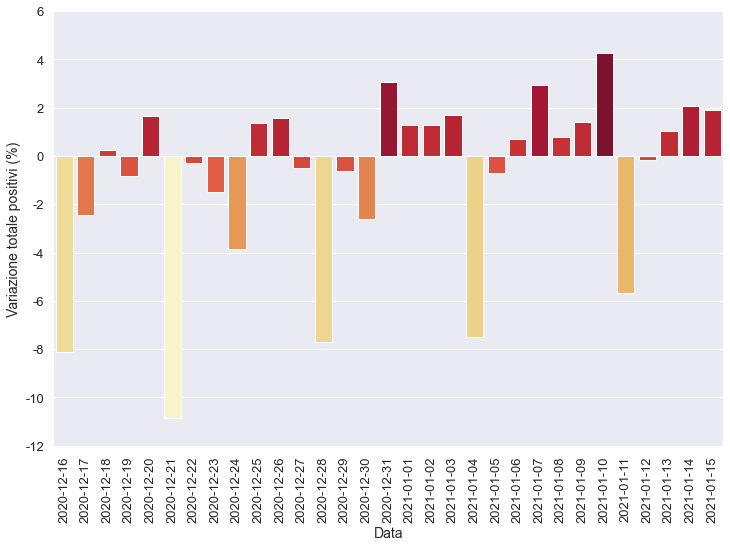

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

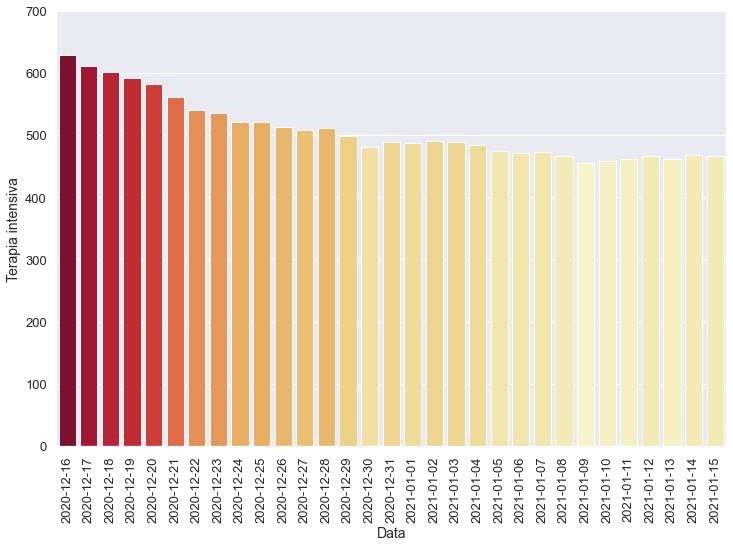

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

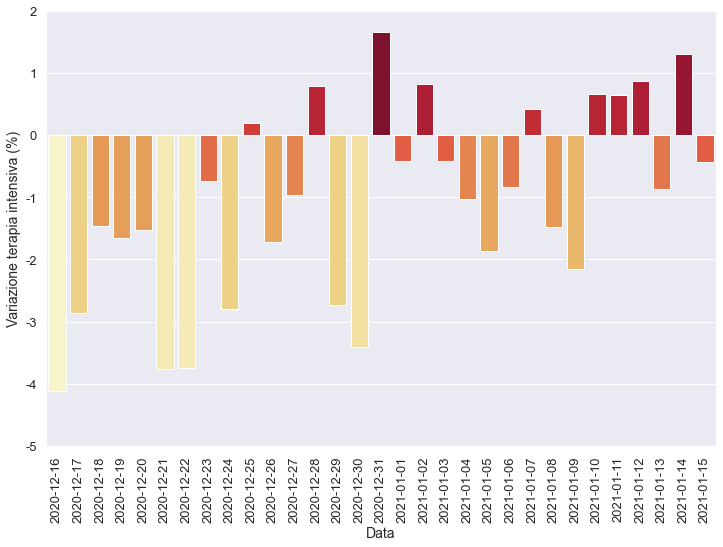

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

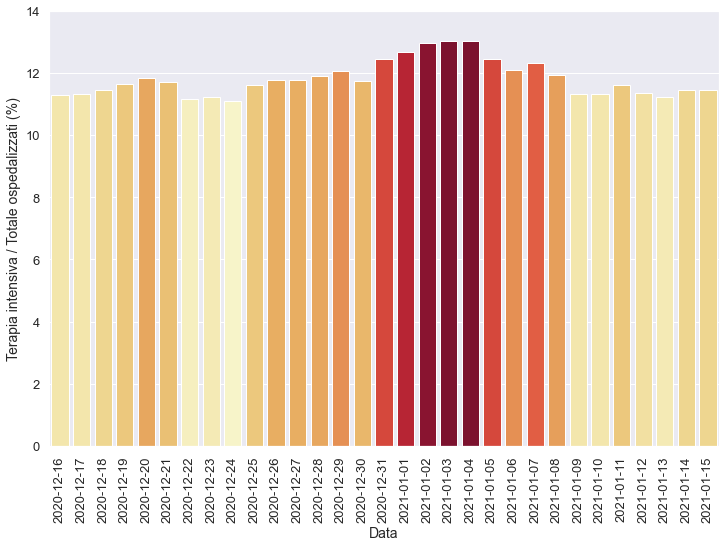

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

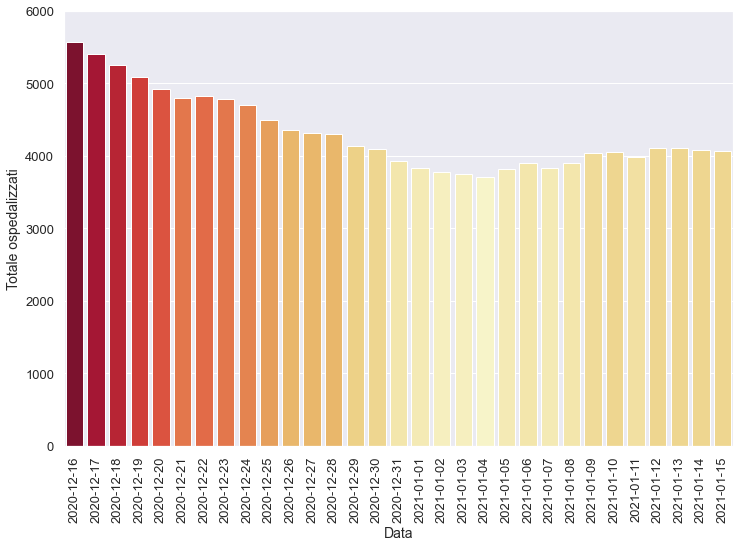

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

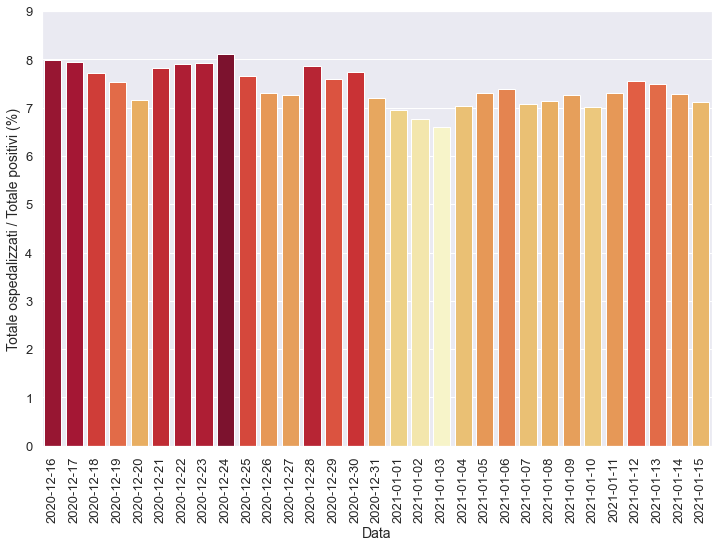

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

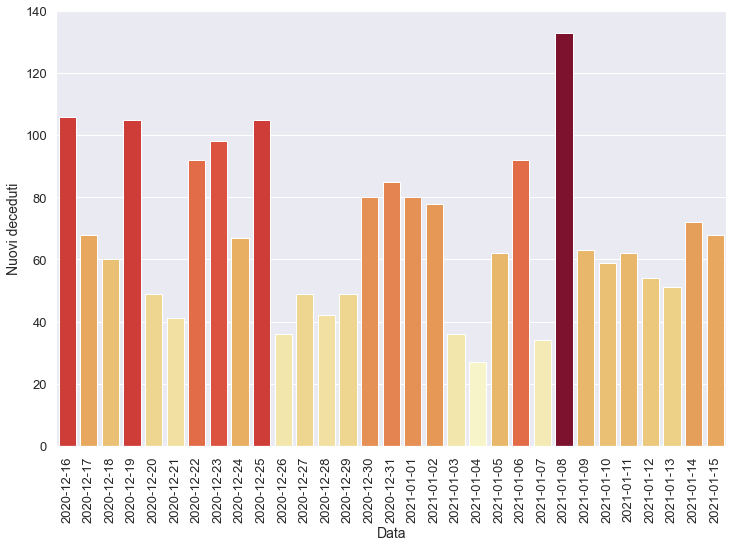

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

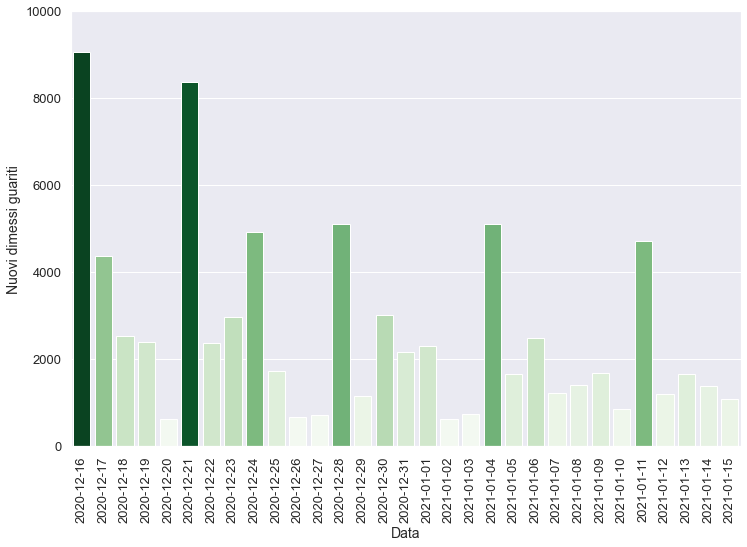

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-08T17:00:00,3,Lombardia,3436,466,3902,50775,54677,435,1963,...,133.0,18415.0,6411.0,369.0,11.94,7.14,10.66,30.62,-1.48,0.80
1,2021-01-09T17:00:00,3,Lombardia,3577,456,4033,51404,55437,760,2506,...,63.0,24847.0,8061.0,629.0,11.31,7.27,10.09,31.09,-2.15,1.39
2,2021-01-10T17:00:00,3,Lombardia,3598,459,4057,53741,57798,2361,3267,...,59.0,25011.0,9791.0,2337.0,11.31,7.02,13.06,33.37,0.66,4.26
3,2021-01-11T17:00:00,3,Lombardia,3522,462,3984,50523,54507,-3291,1488,...,62.0,13356.0,5224.0,-3218.0,11.60,7.31,11.14,28.48,0.65,-5.69
4,2021-01-12T17:00:00,3,Lombardia,3641,466,4107,50308,54415,-92,1146,...,54.0,15964.0,5384.0,-215.0,11.35,7.55,7.18,21.29,0.87,-0.17
5,2021-01-13T17:00:00,3,Lombardia,3651,462,4113,50850,54963,548,2245,...,51.0,31880.0,9584.0,542.0,11.23,7.48,7.04,23.42,-0.86,1.01
6,2021-01-14T17:00:00,3,Lombardia,3614,468,4082,52018,56100,1137,2587,...,72.0,28645.0,9629.0,1168.0,11.46,7.28,9.03,26.87,1.30,2.07
7,2021-01-15T17:00:00,3,Lombardia,3601,466,4067,53087,57154,1054,2205,...,68.0,33947.0,9162.0,1069.0,11.46,7.12,6.50,24.07,-0.43,1.88


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

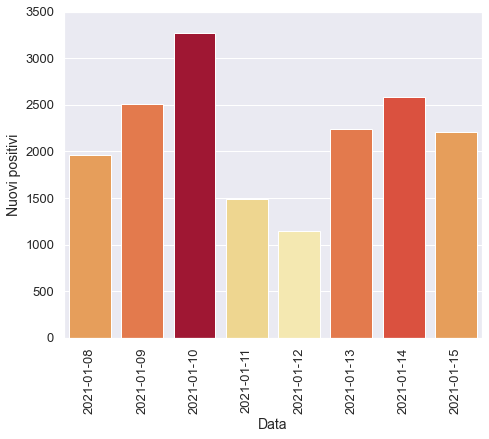

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

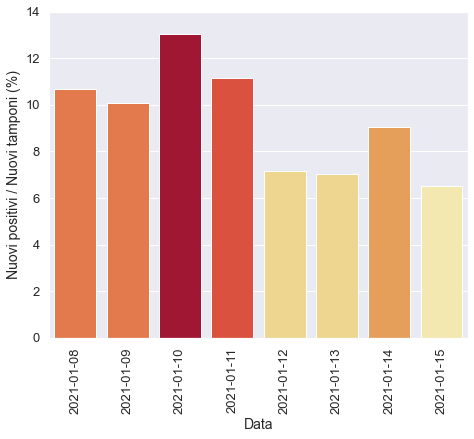

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

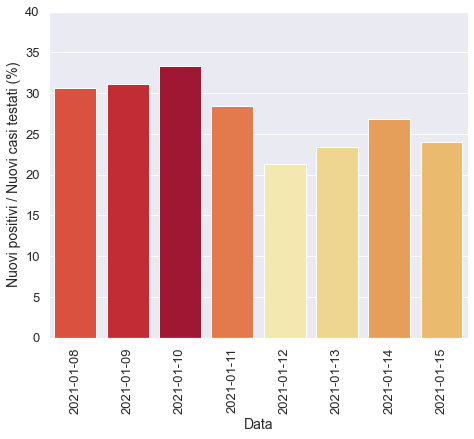

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

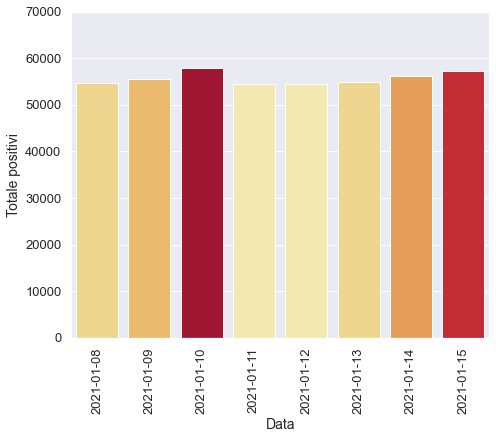

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

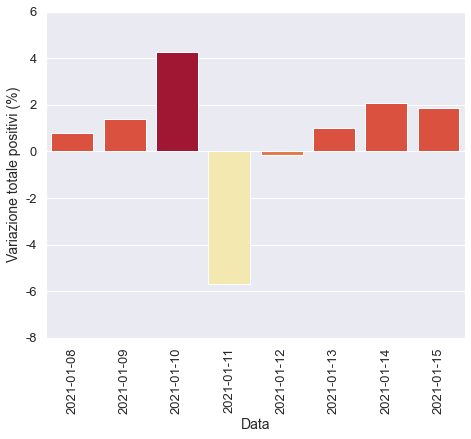

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

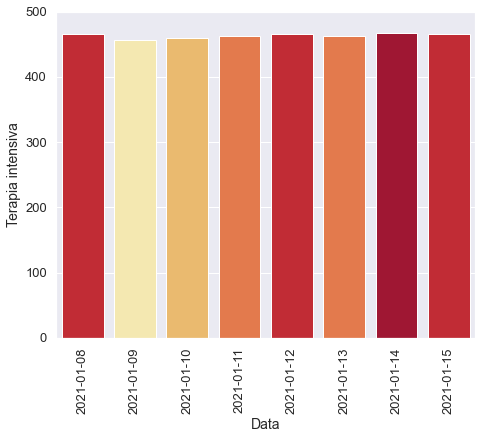

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

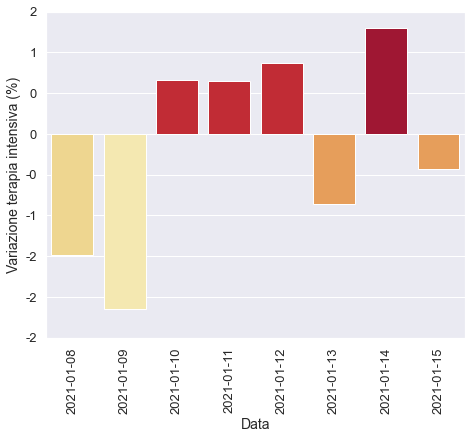

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

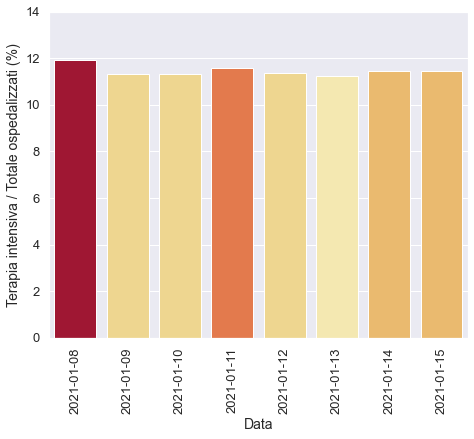

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

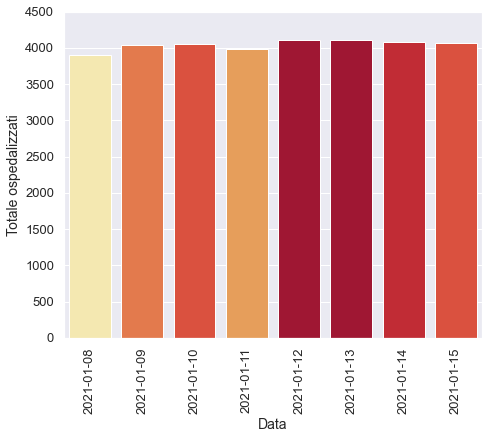

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

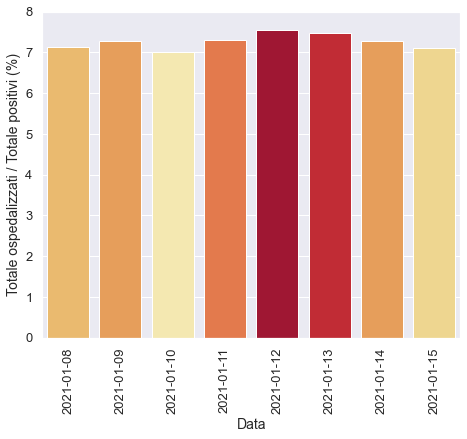

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

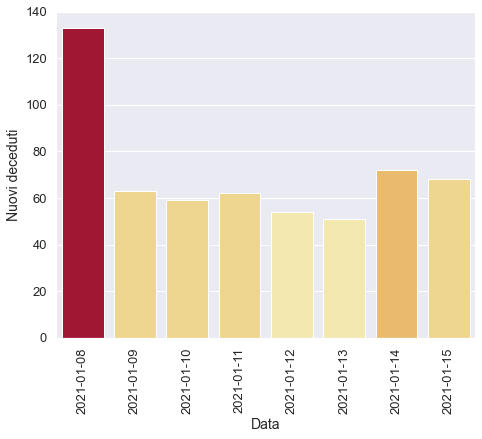

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

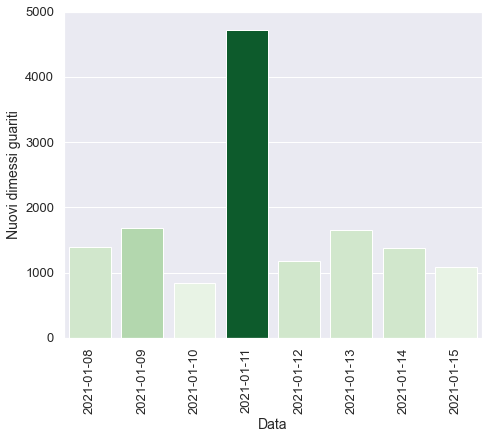

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)